## Exploratory Data Analysis - Netflix, Hulu, Disney+, Amazon Movies & Shows Ratings

    Github - 

#### Data Source 1 – 

    Data Source - https://www.kaggle.com/shivamb/netflix-shows
    Data Name – Netflix Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (8807), Columns (12), Size (3.24 MB)

    
#### Data Source 2 –

    Data Source - https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows
    Data Name – Amazon Prime Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (9668), Columns (12), Size (3.78 MB)
    
#### Data Source 3 –

    Data Source – https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
    Name – Disney+ Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (1450), Columns (12), Size (374 KB)


#### Data Source 4 –

    Data Source – https://www.kaggle.com/shivamb/hulu-movies-and-tv-shows
    Name – Hulu Movies & TV Shows
    Data was found on Kaggle, and list provided by Professor. It is free to download and legal to access. Documented EDA of Data     is not available.
    Data Size – Rows (3073), Columns (12), Size (1.05 MB)


#### Columns Information
    1.  show_id - Show ID
    2.  type - Is it a Movie or TV Show
    3.  title - Title/Name of Movie or TV Show
    4.  director - Director of the Movie or TV Show
    5.  Cast - List of Cast in Movie or TV Show
    6.  country - Origin Country
    7.  date_added - Date when it was added on platform
    8.  release_year - When it was released
    9.  rating - Ratings of Movie or TV Show
    10. duration   Duration of Movie or TV Show
    11. description - Description of Movie or TV Show
    12. Category - Category of Movie or TV Show

#### Breakdown of the project – 

    1. Loading dataset, Combining two datasets, and Cleaning.
    2. Finding relationship between features of dataset
    3. Creating visulization based on found relationships

In [1]:
## Importing Libraries

import time
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#https://github.com/ResidentMario/missingno
import missingno as msno

In [2]:
## Importing data of Netflix, Hulu, Amazon Prime, and Disney Plus as dataframe.

start_time = time.time()
netflix_df = pd.read_csv("netflix_titles.csv")
hulu_df = pd.read_csv("hulu_titles.csv")
amazon_df = pd.read_csv("amazon_prime_titles.csv")
disney_df = pd.read_csv("disney_plus_titles.csv")
print(time.time() - start_time,'seconds')
print(netflix_df.shape)
print(hulu_df.shape)
print(amazon_df.shape)
print(disney_df.shape)

0.1765282154083252 seconds
(8807, 12)
(3073, 12)
(9668, 12)
(1450, 12)


In [3]:
## Looking their columns

print(netflix_df.columns)
print(hulu_df.columns)
print(amazon_df.columns)
print(disney_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
## Printing how many null values are present in each columns of each dataframes

print(netflix_df.isnull().sum(),"\n")
print(hulu_df.isnull().sum(),"\n")
print(amazon_df.isnull().sum(),"\n")
print(disney_df.isnull().sum(),"\n")

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64 

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64 

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64 

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0

In [5]:
## Netflix Dataframe

netflix_df['service'] = 'Netflix'

netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix


In [6]:
## Hulu Dataframe

hulu_df['service'] = 'Hulu'

hulu_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,Hulu
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",Hulu
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,Hulu
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...,Hulu
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...,Hulu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu


In [7]:
## Disney Plus Dataframe

disney_df['service'] = 'Disney Plus'

disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney Plus
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney Plus
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney Plus
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney Plus
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney Plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney Plus
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney Plus
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney Plus
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney Plus


In [8]:
## Amazon Prime Dataframe

amazon_df['service'] = 'Amazon Prime'

amazon_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [9]:
## Merging All Dataframes into single one

frames = [netflix_df, hulu_df, disney_df, amazon_df]
final_df = pd.concat(frames)
final_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,service
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


# Data - Untidy -> Tidy

In [10]:
## ID Variables of Final Dataframe1

id_vars1 = [
    'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
    'release_year', 'rating', 'duration', 'listed_in', 'description', 'service'
]

In [11]:
## Split Final Cast Column and adding them back to new dataframe

final_df_cast_expanded = final_df['cast'].str.split(',', expand=True)
final_df_cast_expanded.columns = ['C'+str(i) for i in final_df_cast_expanded.columns]

## Concating old Final Dataframe & Expanded Cast dataframe
concated_final_df = pd.concat([final_df, final_df_cast_expanded], axis = 1)

final_df1 = pd.melt(concated_final_df, id_vars1, value_vars=final_df_cast_expanded.columns, var_name='Cast Number', value_name='Cast')

## Dropping Extra 'cast' Columns
final_df1.drop(final_df1.columns[[4,13]], axis = 1, inplace=True)

In [12]:
## Final Dataframe after extending cast column

final_df1

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,service,Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,NaN
4,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747843,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime,None
1747844,s9665,TV Show,Planet Patrol,NaN,NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,None
1747845,s9666,Movie,Outpost,Steve Barker,NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,None
1747846,s9667,TV Show,Maradona: Blessed Dream,NaN,NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime,None


In [13]:
## ID Variables of Final Dataframe2

id_vars2 = [
    'show_id', 'type', 'title', 'director', 'Cast', 'country', 'date_added',
    'release_year', 'rating', 'duration', 'listed_in', 'description', 'service'
]

In [14]:
## Split Final Listed In Column

final_df_listed_expanded = final_df1['listed_in'].str.split(',', expand =True)
final_df_listed_expanded.columns = ['L'+str(i) for i in final_df_listed_expanded.columns]

## Concating old Final Dataframe & Expanded Listed dataframe
concated_final_df = pd.concat([final_df1, final_df_listed_expanded], axis = 1)

final_df2 = pd.melt(concated_final_df, id_vars2, value_vars=final_df_listed_expanded.columns, var_name='Listing Number', value_name='Category')

## Dropping Extra 'listed_in' Columns
final_df2.drop(final_df2.columns[[10,13]], axis = 1, inplace=True)

In [15]:
## Final Dataframe after extending Category column

final_df2

,show_id,type,title,director,Cast,country,date_added,release_year,rating,duration,description,service,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Netflix,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Netflix,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Netflix,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Netflix,Docuseries
4,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,Netflix,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739235,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,None,NaN,NaN,1940,7+,60 min,New York City street principles get an East Si...,Amazon Prime,None
8739236,s9665,TV Show,Planet Patrol,NaN,None,NaN,NaN,2018,13+,4 Seasons,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,None
8739237,s9666,Movie,Outpost,Steve Barker,None,NaN,NaN,2008,R,90 min,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,None
8739238,s9667,TV Show,Maradona: Blessed Dream,NaN,None,NaN,NaN,2021,TV-MA,1 Season,"The series tells the story of Diego Maradona, ...",Amazon Prime,None


In [16]:
## Converting to needed datatypes 
final_df2['date_added'] = final_df2['date_added'].str.replace(' ', '') # Removing extra spaces for format

# Changing to datetime datatype
final_df2['date_added'] = pd.to_datetime(final_df2['date_added'], format='%B%d,%Y')

final_df2 = final_df2.astype({"show_id":'category', "type":'category', "title":'category', "director":'category', "Cast":'category', "country":'category', "release_year":'category', "rating":'category', "duration":'category', "description":'category', "Category":'category'})

In [17]:
## Looking for new columns and rows

final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739240 entries, 0 to 8739239
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   show_id       category      
 1   type          category      
 2   title         category      
 3   director      category      
 4   Cast          category      
 5   country       category      
 6   date_added    datetime64[ns]
 7   release_year  category      
 8   rating        category      
 9   duration      category      
 10  description   category      
 11  service       object        
 12  Category      category      
dtypes: category(11), datetime64[ns](1), object(1)
memory usage: 313.0+ MB


### Type
    There are two types in Type column - Movie & TV Show

In [18]:
## Row counts of each type

pd.DataFrame(final_df.type.value_counts())

,type
Movie,16481
TV Show,6517


In [19]:
## Percentage of data in type column

pd.DataFrame(final_df.type.value_counts(normalize=True))

,type
Movie,0.716628
TV Show,0.283372


<AxesSubplot:ylabel='type'>

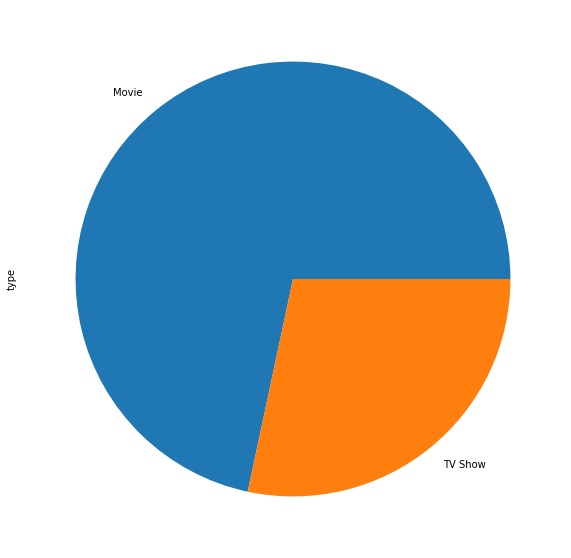

In [20]:
## Type - Movie v/s TV Show

plt.figure(figsize=(20,10))
final_df.type.value_counts().plot(kind='pie')

### Director
    Director Column Analysis.

In [21]:
## Count of Movies & TV Shows under each director

pd.DataFrame(final_df.director.value_counts())

,director
Mark Knight,113
Cannis Holder,61
Jay Chapman,46
Moonbug Entertainment,37
Arthur van Merwijk,30
...,...
Steve McLean,1
Gabe Klinger,1
Jean-Simon Chartier,1
"Daniel Mann, Joseph Sargent",1


<AxesSubplot:>

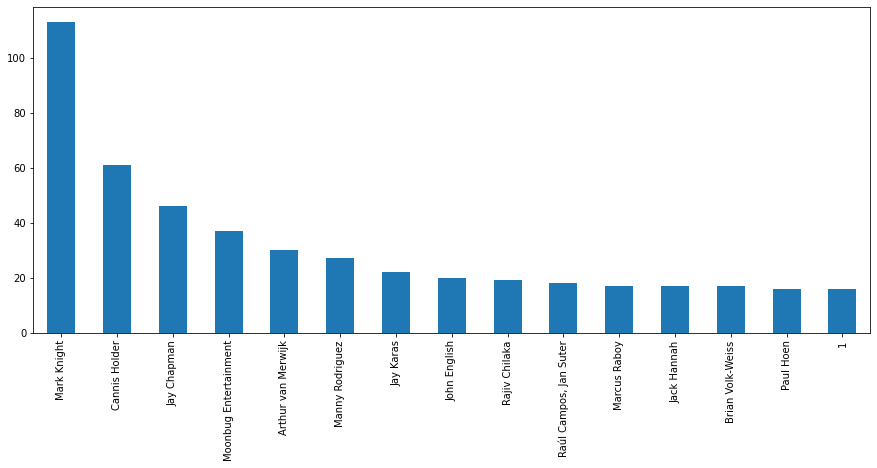

In [22]:
## Bargraph showing top 15 directors & count of their work

plt.figure(figsize=(15,6))
final_df.director.value_counts().head(15).plot(kind='bar')

### Cast
    Cast column Analysis.

In [23]:
## Count of movies & tv shows by  by Actor & Actresses

pd.DataFrame(final_df2.Cast.value_counts()).head(15)

,Cast
Maggie Binkley,280
Anupam Kher,280
Nassar,215
Shah Rukh Khan,175
Paresh Rawal,175
1,175
Jim Cummings,175
Prakash Raj,160
Om Puri,160
Gene Autry,160


<AxesSubplot:>

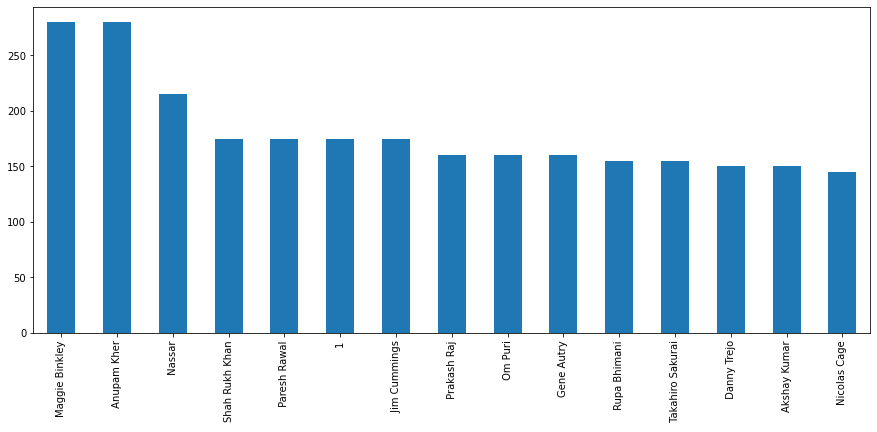

In [24]:
## Bargraph showing top 15 Actors & Actresses and count of their work

plt.figure(figsize=(15,6))
final_df2.Cast.value_counts().head(15).plot(kind='bar')

### Country
    Country column Analysis.

In [25]:
## Count of movies & tv shows by Country

pd.DataFrame(final_df.country.value_counts())

,country
United States,4997
India,1203
United Kingdom,583
Japan,515
Canada,237
...,...
"Spain, Portugal",1
"Mexico, Argentina",1
"United Kingdom, Canada, United States, Cayman Islands",1
"Indonesia, United States",1


<AxesSubplot:>

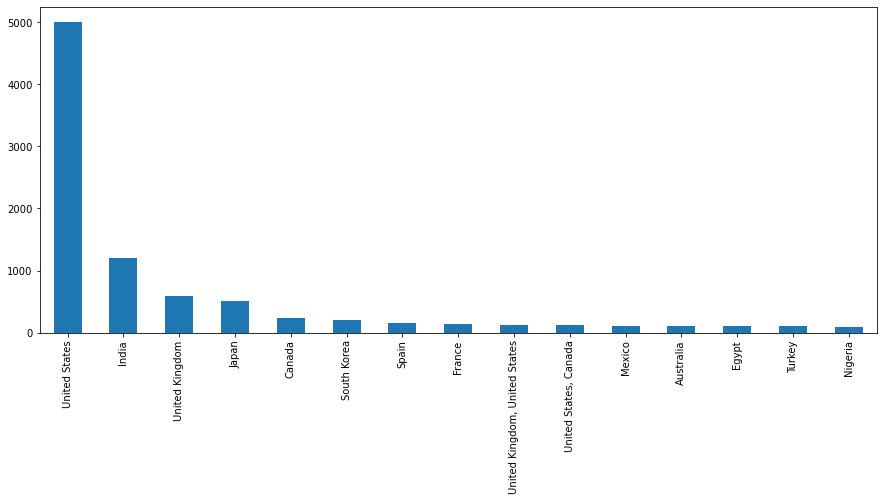

In [26]:
## Bargraph showing top 15 Countries and count of Movies & TV Shows from there

plt.figure(figsize=(15,6))
final_df.country.value_counts().head(15).plot(kind='bar')

<AxesSubplot:ylabel='country'>

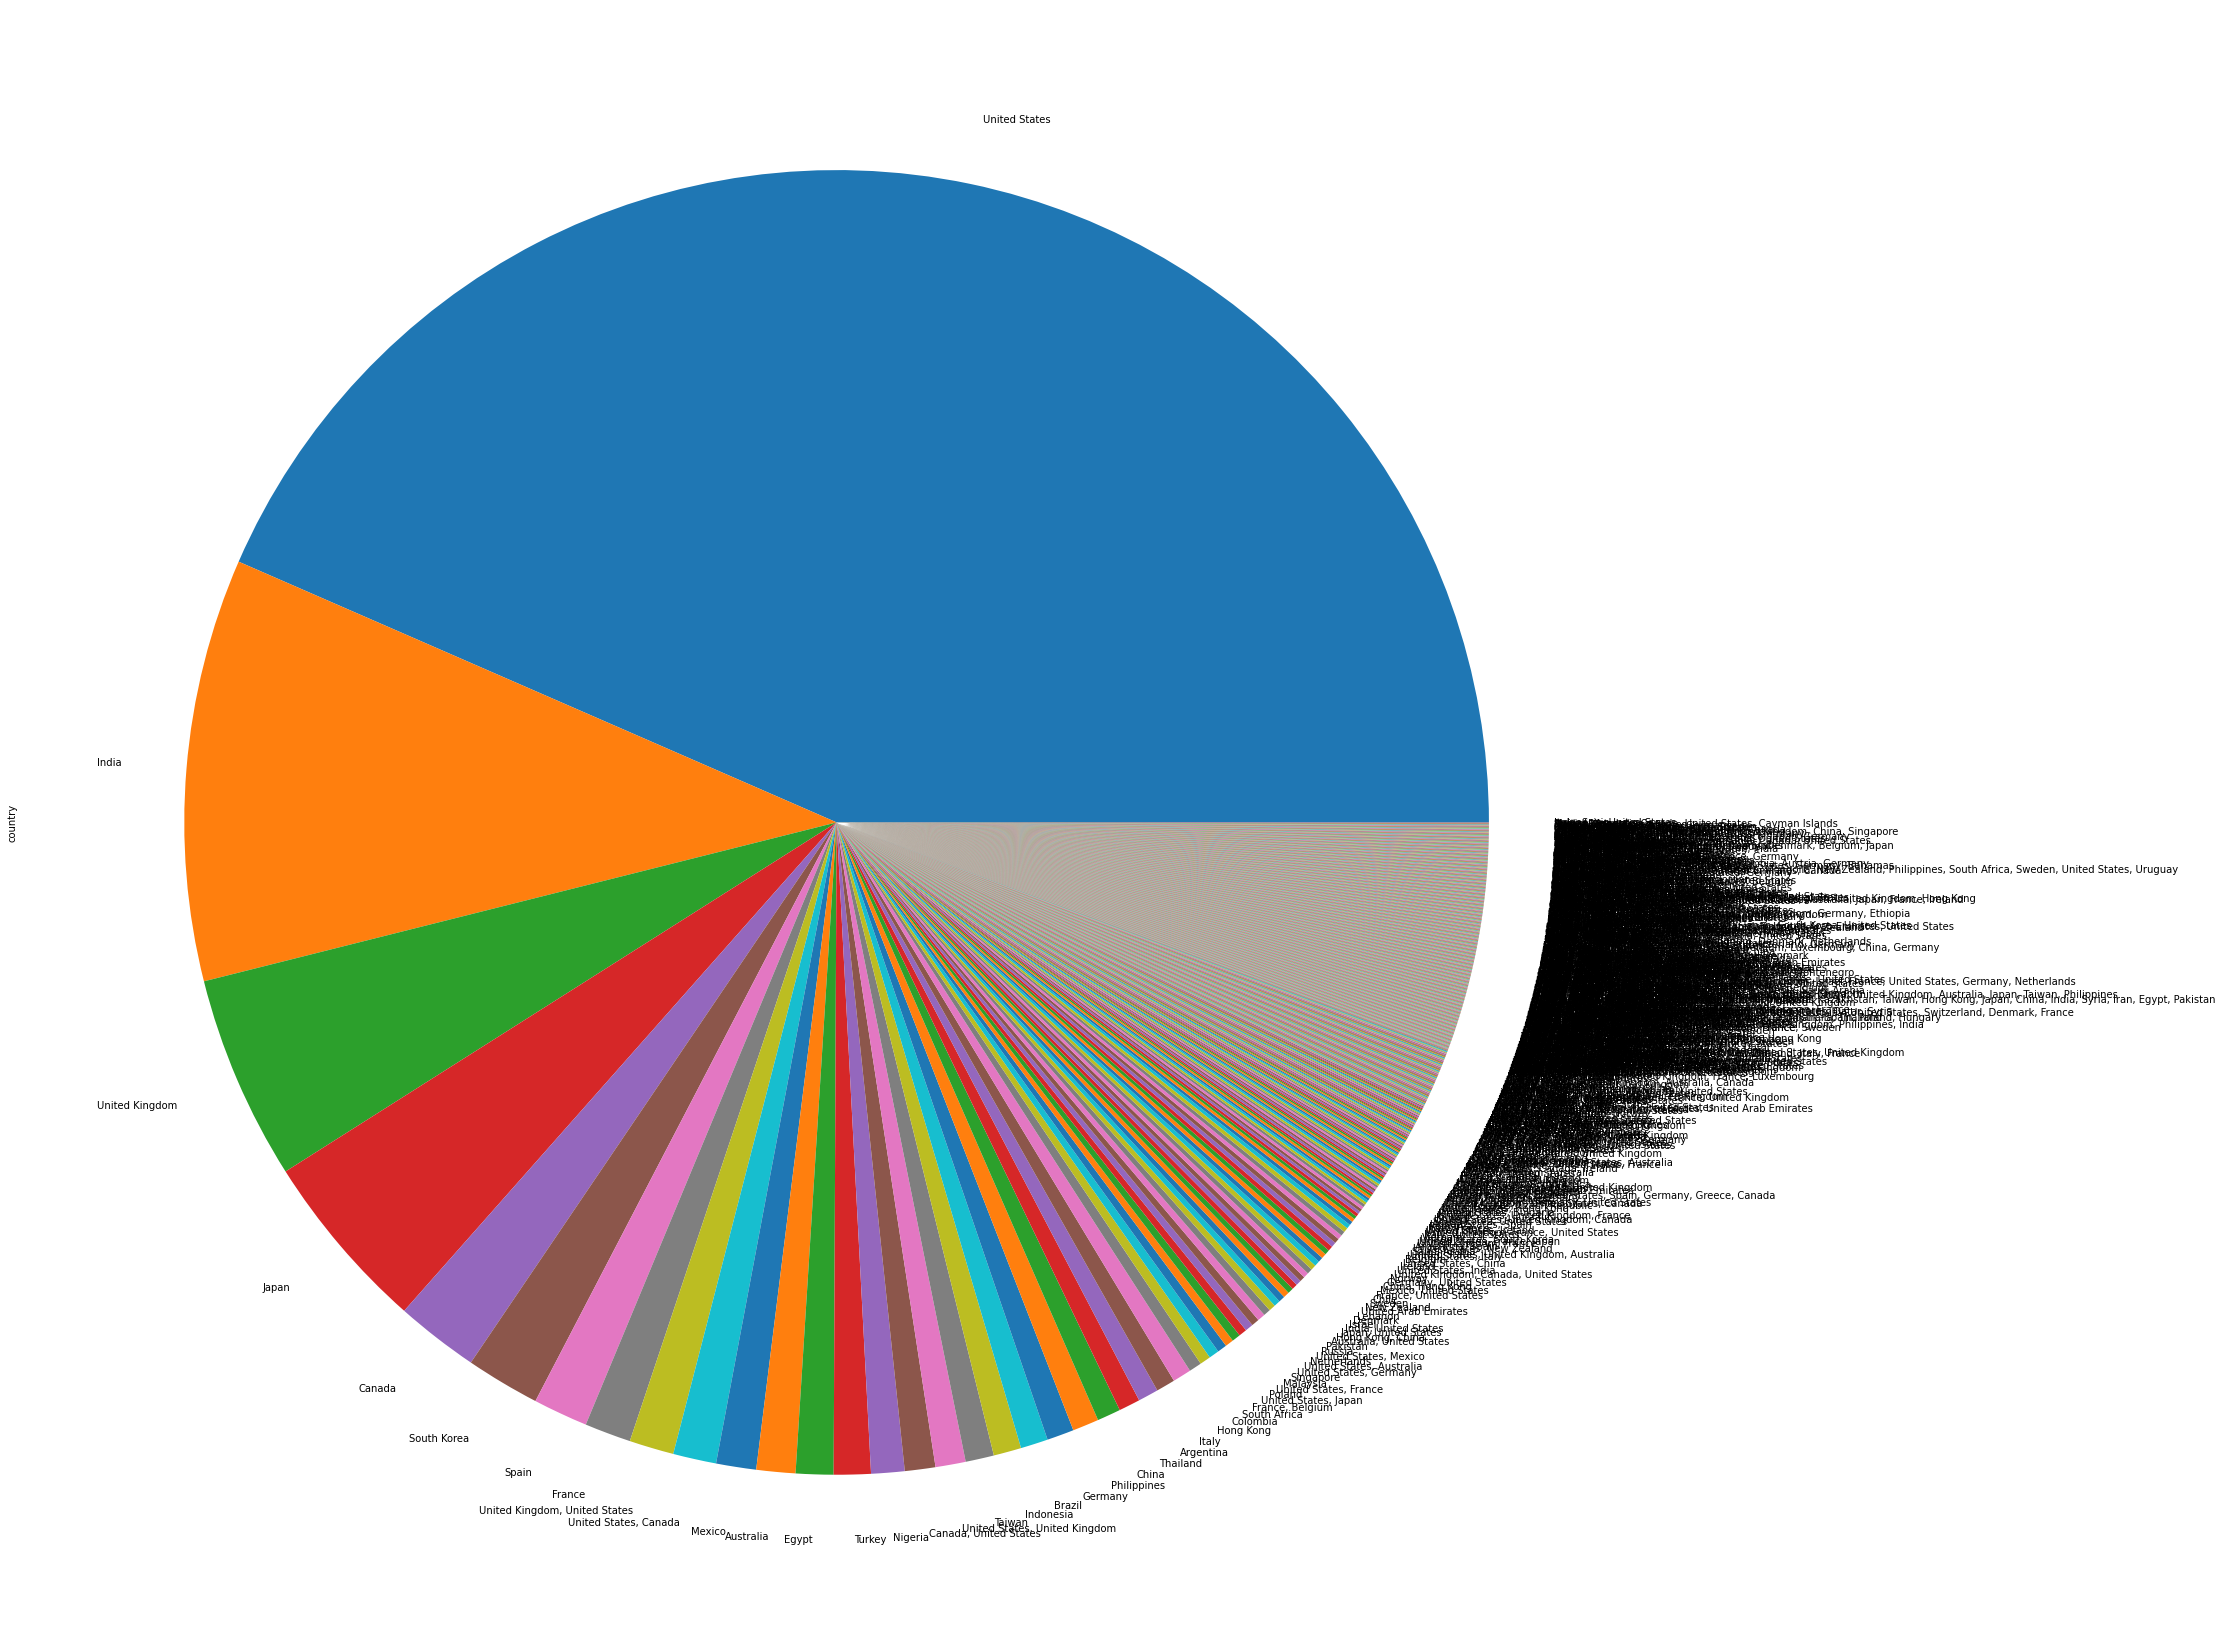

In [27]:
## Pie-Chart showing Countries and count of Movies & TV Shows from there

plt.figure(figsize=(30,30))
final_df.country.value_counts().plot(kind='pie')

### Date Added
    Date Added column Analysis.

In [28]:
## Analyzing Content Added Date and count of movies & tv shows added in them.

pd.DataFrame(final_df.date_added.value_counts())

,date_added
"November 12, 2019",724
"January 1, 2020",145
"July 1, 2021",132
"September 1, 2021",107
"December 31, 2019",105
...,...
"June 25, 2017",1
"October 13, 2018",1
"July 8, 2019",1
"October 31, 2015",1


<AxesSubplot:>

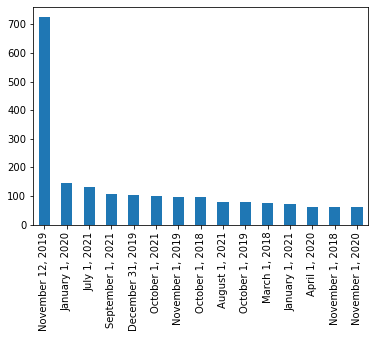

In [29]:
## Bargraph showing top 15 Countries and count of Movies & TV Shows from there

final_df.date_added.value_counts().head(15).plot(kind='bar')

## Fun Fact

### 2007
In 2007 Netflix began offering subscribers the option to stream some of its movies and television shows directly to their homes through the Internet. For most subscription plans, the streaming service was unlimited.

### Release Year
    Release Year column Analysis.

In [30]:
## Analyzing Content Release Year with count of movies & tv shows released in them.

pd.DataFrame(final_df.release_year.value_counts())

,release_year
2019,2470
2020,2406
2021,2385
2018,2105
2017,1892
...,...
1922,2
1926,2
1928,1
1924,1


<AxesSubplot:>

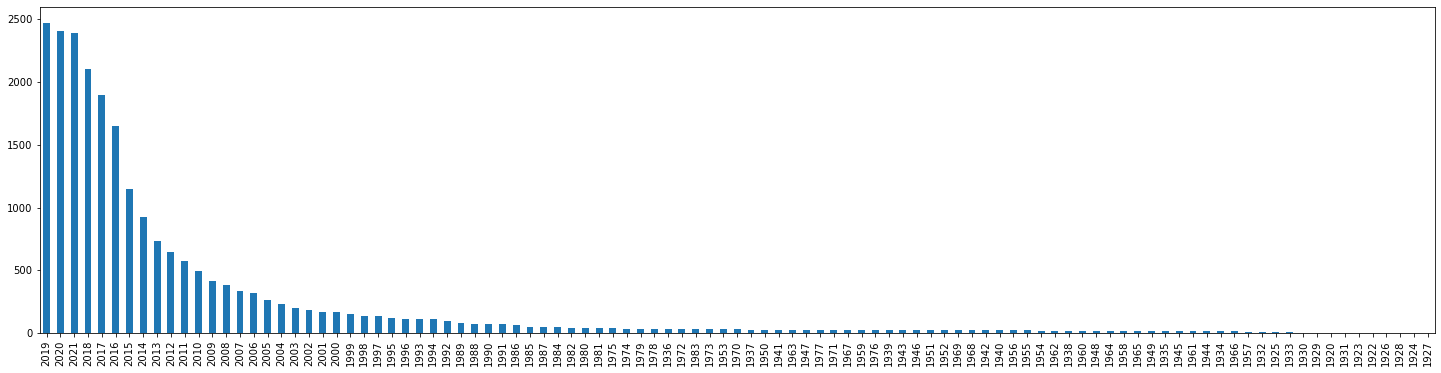

In [31]:
## Bargraph showing Years and count of Movies & TV Shows released in them

plt.figure(figsize=(25,6))
final_df.release_year.value_counts().plot(kind='bar')

### Ratings

##### TV Ratings:

    TV-Y: All Children
    TV-Y7: Directed to Older Children
    TV-Y7 FV: Directed to Older Children - Fantasy Violence
    TV-G: General Audience
    TV-PG: Parent Guidance Suggested
    TV-14: Parents Strongly Cautioned
    TV-MA: Mature Audience Only
    Unrated: Its not rated
    
##### Movie Ratings:

    G: General Audience
    PG: Parental Guidance Suggested
    PG-13: Parents Strongly Cautioned
    R: Restricted
    NC-17: Clearly Adult
    Unrated: Its not rated

In [32]:
## Ratings & Counts of movies & tv shows

pd.DataFrame(final_df.rating.value_counts())

,rating
TV-MA,3675
TV-14,3138
R,2154
13+,2117
TV-PG,1654
...,...
115 min,1
61 min,1
28 min,1
64 min,1


<AxesSubplot:>

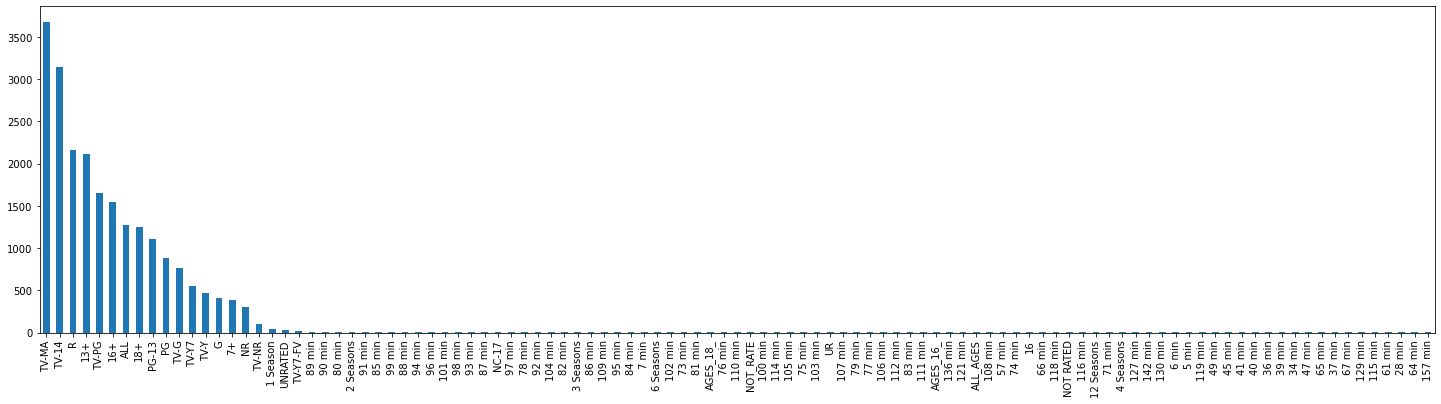

In [33]:
## Bar-graph showing ratings counts

plt.figure(figsize=(25,6))
final_df.rating.value_counts().plot(kind='bar')

### Duration
    Duration column Analysis.

In [34]:
## Duration-wise Count

pd.DataFrame(final_df.duration.value_counts())

,duration
1 Season,4183
2 Seasons,1001
3 Seasons,475
90 min,429
91 min,419
...,...
230 min,1
25 Seasons,1
214 min,1
233 min,1


<AxesSubplot:>

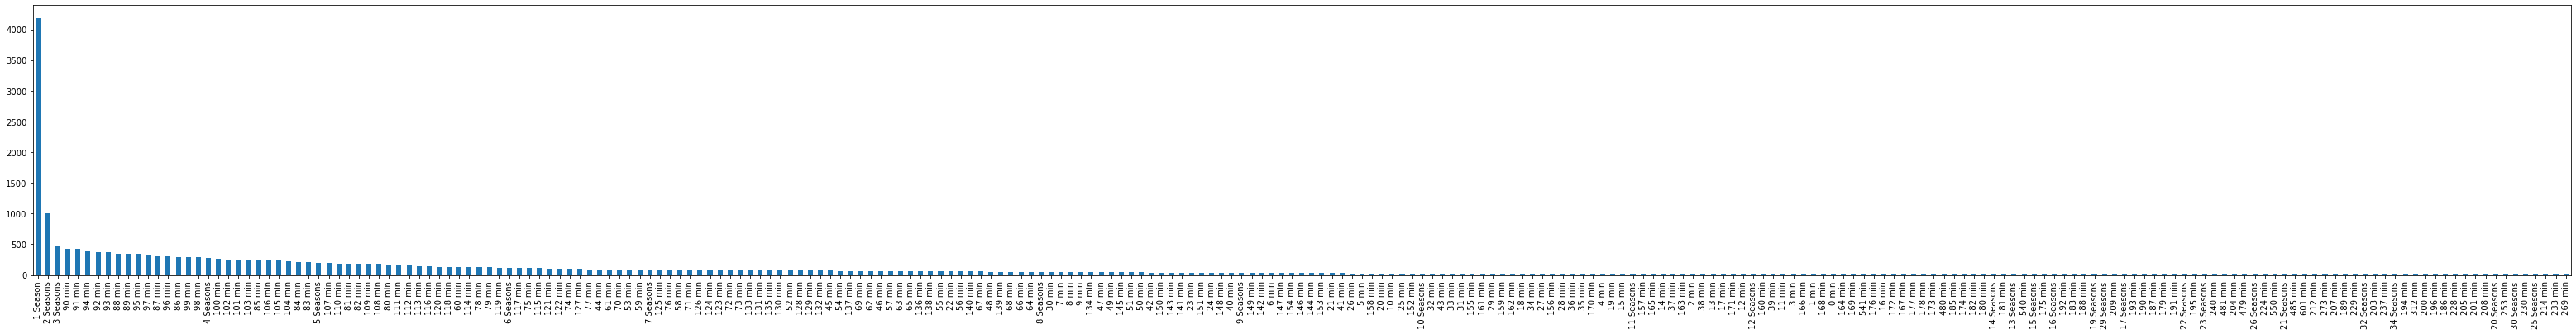

In [35]:
## Bar-Graph for Duration-wise Count

plt.figure(figsize=(55,6))
final_df.duration.value_counts().plot(kind='bar')

### Category
    Category column Analysis.

In [36]:
## Categories & Count of Movies & TV Shows

pd.DataFrame(final_df2.Category.value_counts())

,Category
Drama,202008
International Movies,199424
Action,168112
Comedy,162336
Drama,157320
...,...
TV Sci-Fi & Fantasy,76
Dance,76
Game Show / Competition,76
Sports Movies,76


<AxesSubplot:>

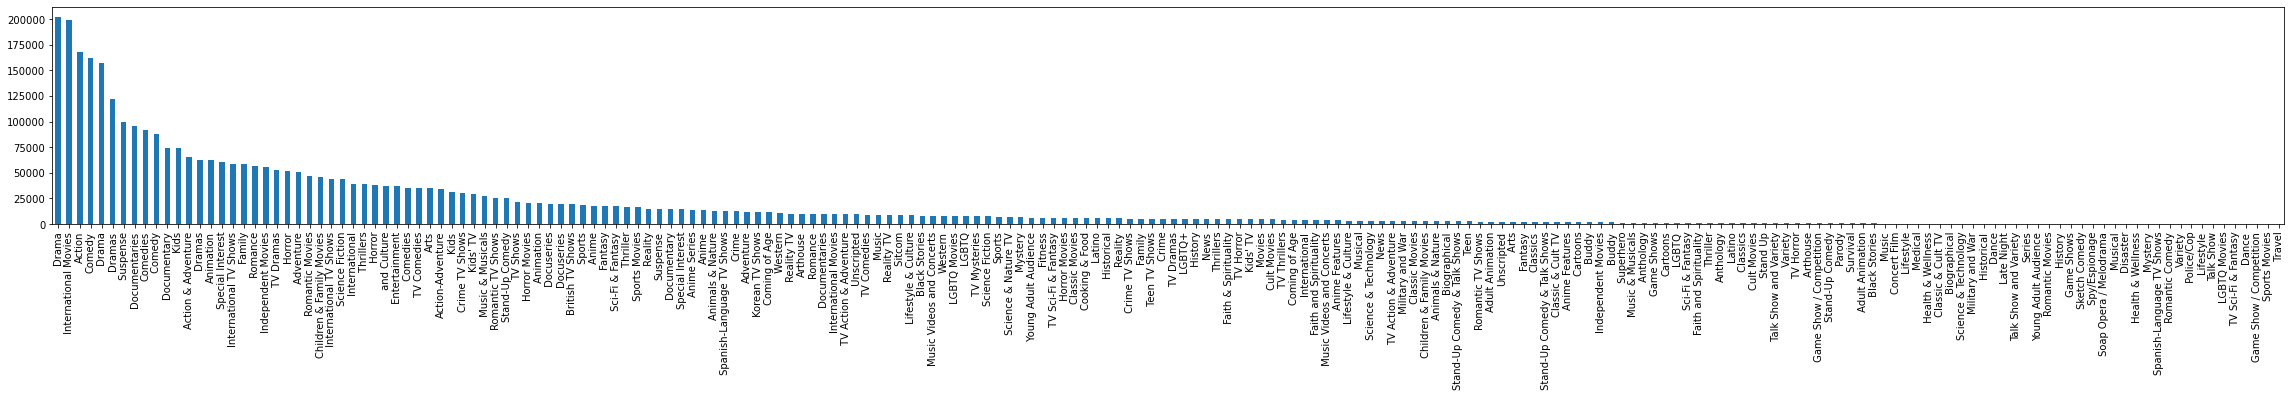

In [37]:
## Bar-graph showing count of movies & tv shows in each category 

plt.figure(figsize=(40,4))
final_df2.Category.value_counts().plot(kind='bar')

In [55]:
## Analyzing Cast Column with Type (Movie or TV Show)

bytype = final_df2.groupby('type').Cast.value_counts(normalize=True)
bytype.unstack().T.sort_values(by=['Movie', 'TV Show'], ascending=False)

type,Movie,TV Show
Anupam Kher,0.000633,0.000036
Maggie Binkley,0.000633,0.000036
Nassar,0.000495,0.000000
Paresh Rawal,0.000403,0.000000
Shah Rukh Khan,0.000403,0.000000
...,...,...
İbrahim Çelikkol,0.000000,0.000036
Şükrü Özyıldız,0.000000,0.000036
アンドレ･ロビンソン,0.000000,0.000036
マティアス・シュヴァイクヘーファー,0.000000,0.000036


<AxesSubplot:xlabel='type'>

<Figure size 2160x2160 with 0 Axes>

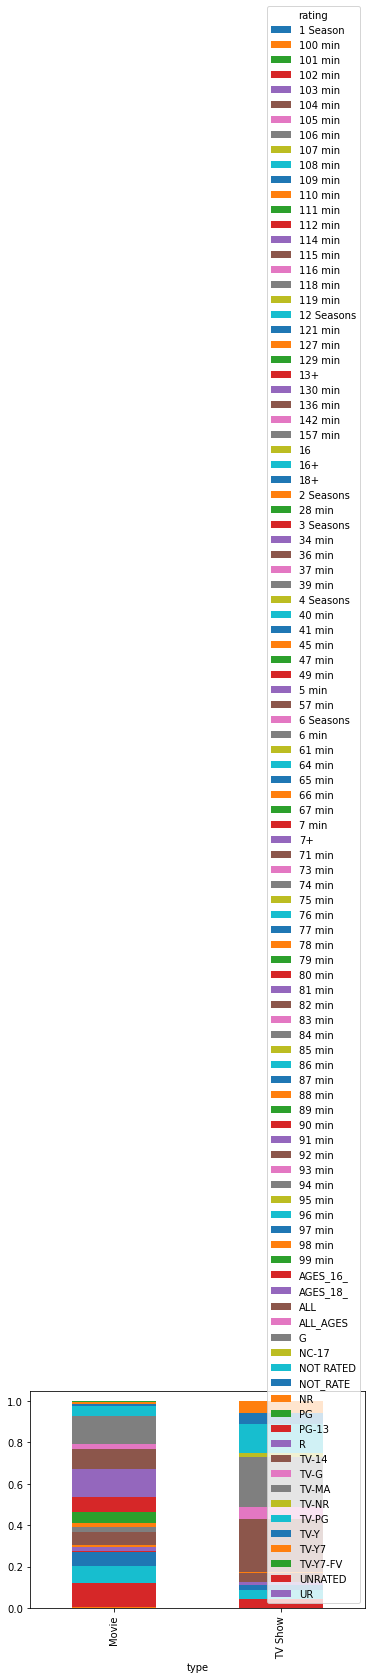

In [69]:
## Bar-graph showing Top 10 cast-type visualization 

plt.figure(figsize=(30,30))
bytype.unstack().head(150).plot(kind='bar', stacked=True)

In [57]:
## Analyzing Ratings vs Country

byrating = final_df.groupby('rating').country.value_counts(normalize=True)
byrating.unstack().T

rating,1 Season,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,,,,,,,,
", France, Algeria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
", South Korea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000315,NaN,NaN,NaN,NaN,NaN
"Afghanistan, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Afghanistan, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000955,0.002854,0.007286,0.012291,0.002521,0.007273,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Venezuela, Colombia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.001223,0.001821,0.000945,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='rating'>

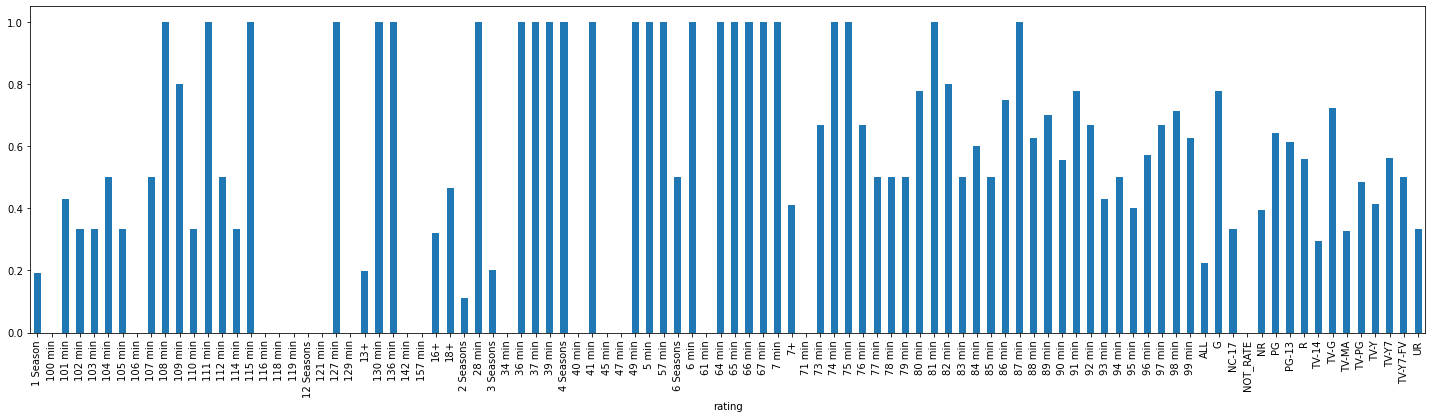

In [66]:
## Pie-Chart showing Ratings of United States

plt.figure(figsize=(25,6))
byrating.unstack()['United States'].plot(kind='bar')

In [59]:
## Analyzing Type vs Ratings

bytype = final_df.groupby('type').rating.value_counts(normalize=True)
bytype.unstack().T

type,Movie,TV Show
rating,,
1 Season,0.002649,NaN
100 min,0.000189,NaN
101 min,0.000441,NaN
102 min,0.000189,NaN
103 min,0.000189,NaN
...,...,...
TV-Y,0.008829,0.051298
TV-Y7,0.011288,0.059105
TV-Y7-FV,0.000757,0.001115


<AxesSubplot:xlabel='type'>

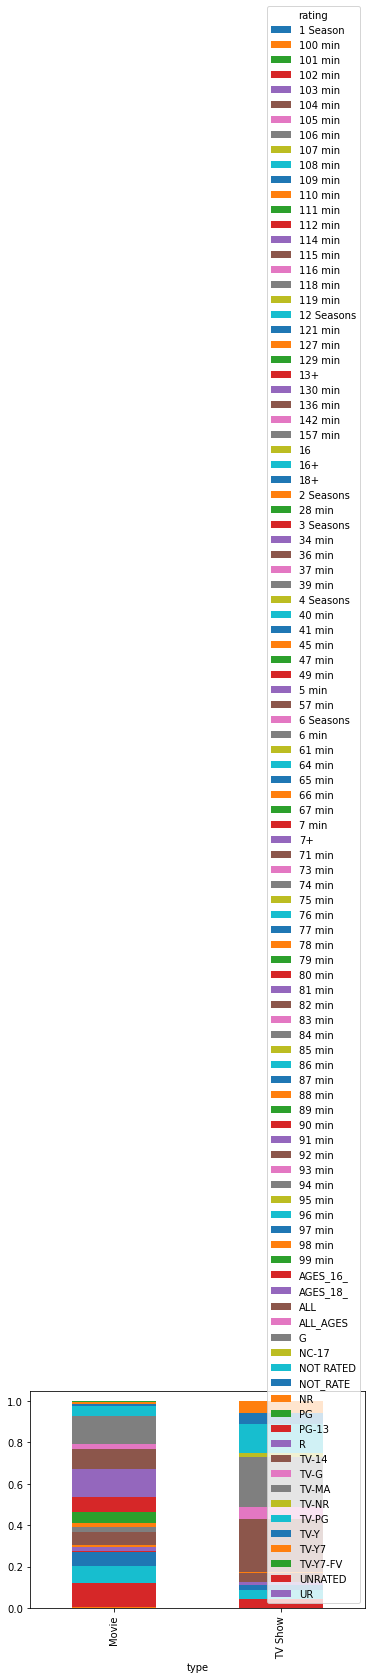

In [67]:
## Rating - Type (Movie or TV Show) Bar Graph

bytype.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:ylabel='Movie'>

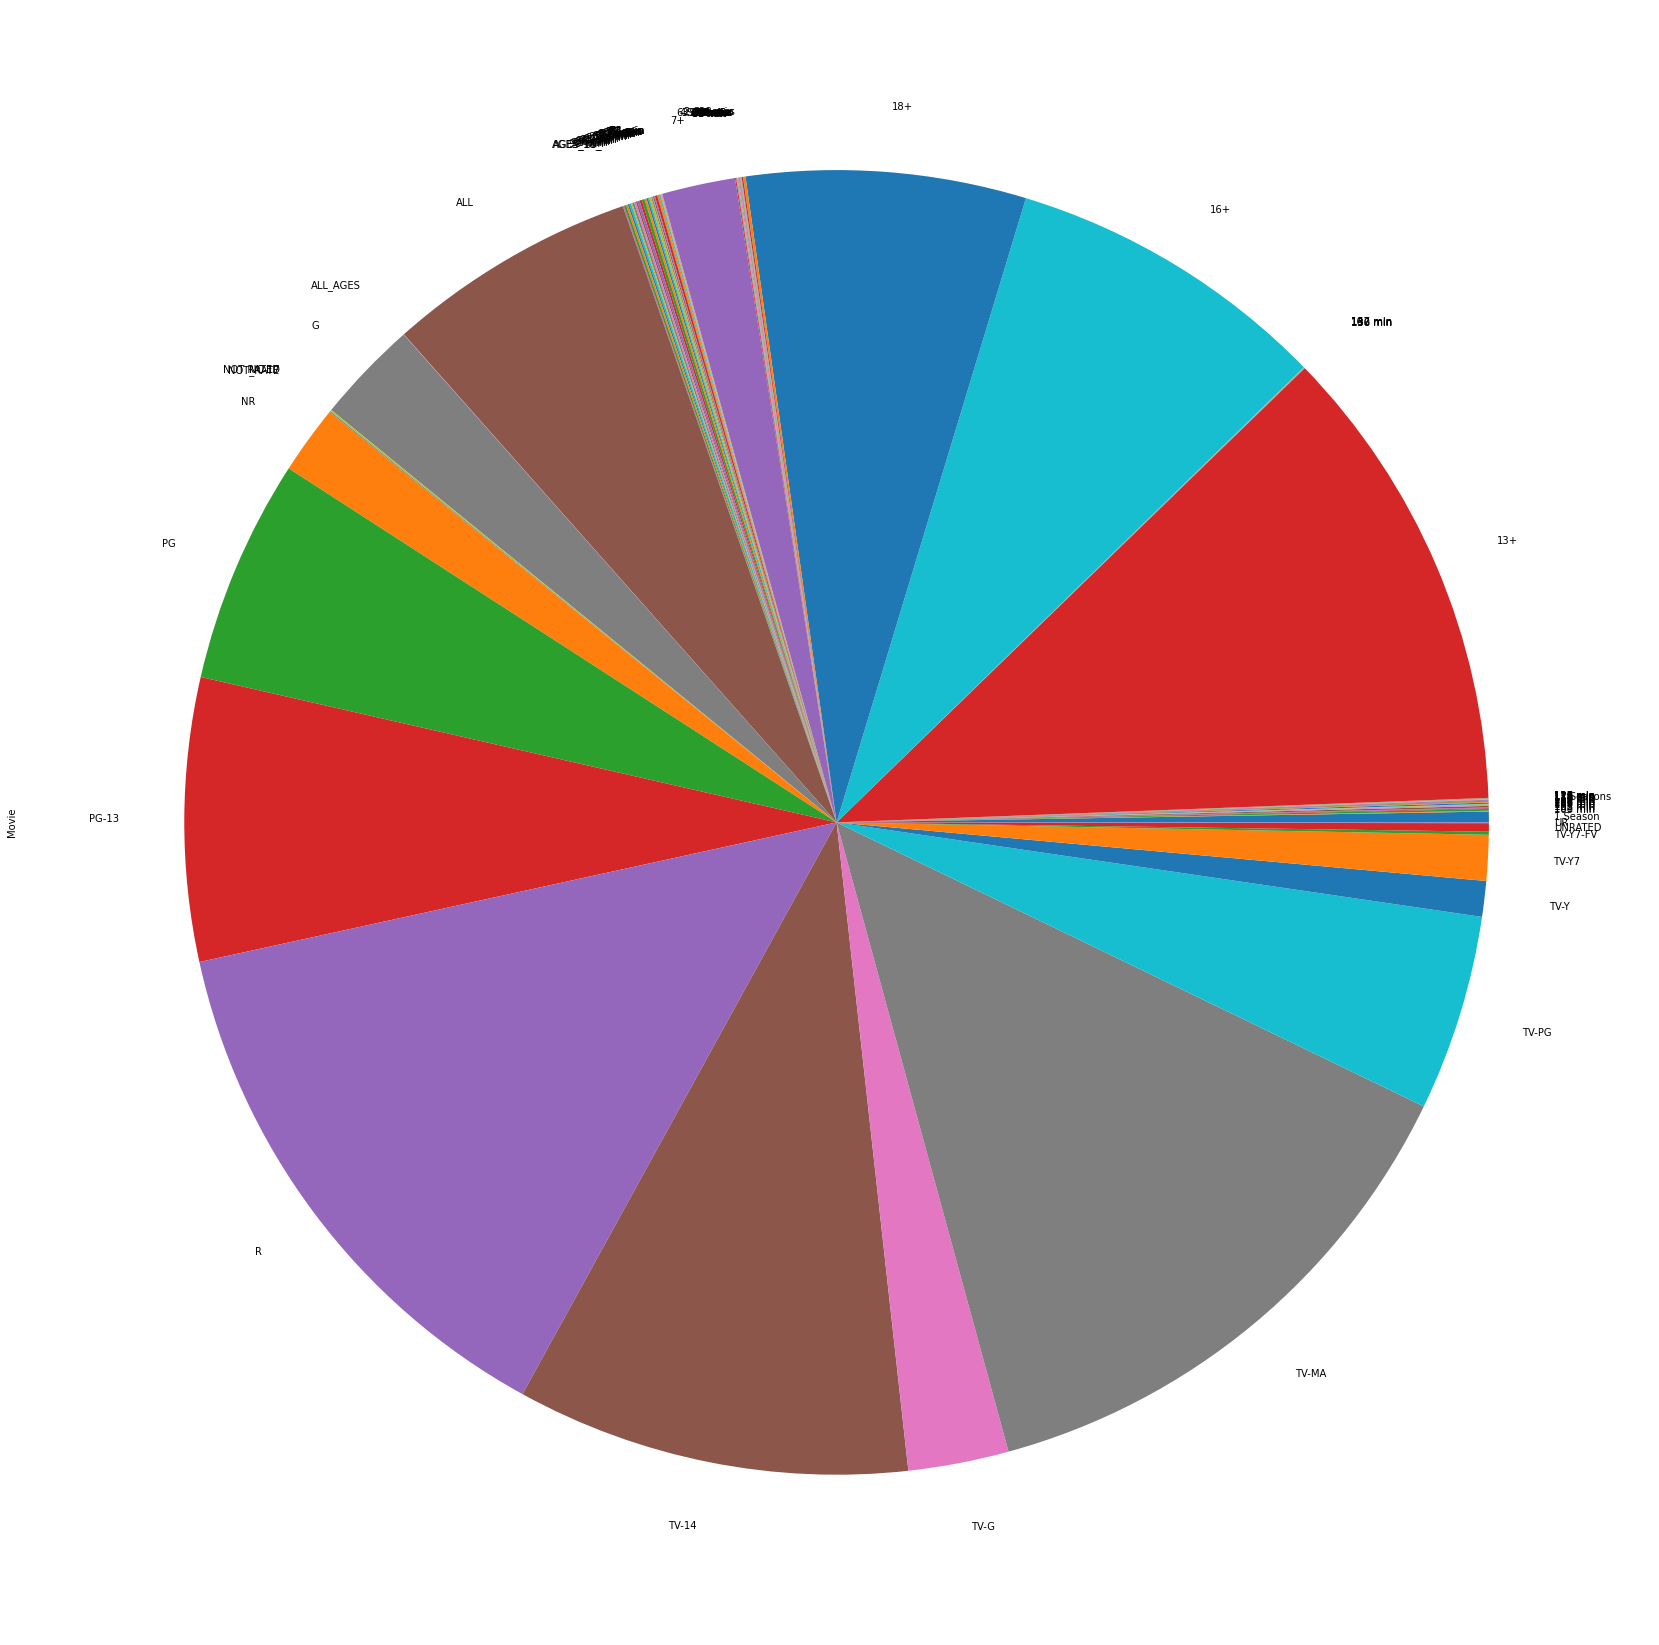

In [68]:
## Movie - Rating Pie Chart

plt.figure(figsize=(30,30))
bytype.unstack().T['Movie'].plot(kind='pie')

<AxesSubplot:ylabel='TV Show'>

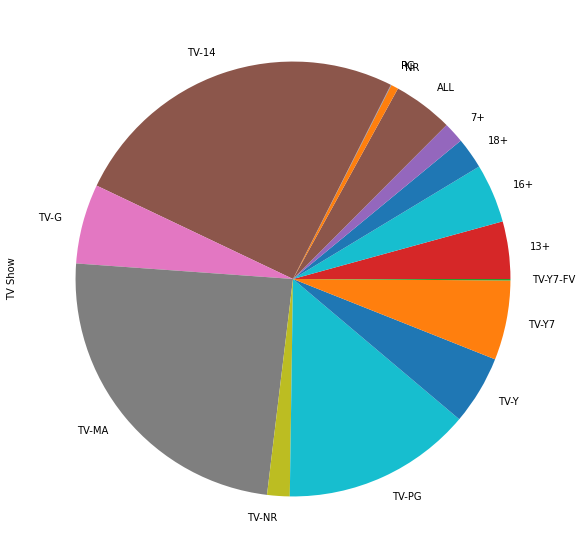

In [62]:
## TV Show - Rating Pie Chart

plt.figure(figsize=(20,10))
bytype.unstack().T['TV Show'].plot(kind='pie')

In [63]:
## Analyzing Category vs Ratings

bycategory = final_df2.groupby('Category').rating.value_counts(normalize=True)
bycategory.unstack()

,1 Season,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,...,TV-14,TV-G,TV-MA,TV-NR,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UNRATED,UR
Category,,,,,,,,,,,,,,,,,,,,,
Adult Animation,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.250000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Adventure,0.013953,0.0,0.003101,0.0,0.00155,0.00155,0.0,0.0,0.0,0.0,...,0.213953,0.015504,0.111628,0.003101,0.079070,0.012403,0.029457,0.000000,0.003101,0.0
Animals & Nature,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.142857,0.057143,0.000000,0.000000,0.342857,0.000000,0.000000,0.000000,0.000000,0.0
Animation,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.003704,0.092593,0.003704,0.000000,0.022222,0.062963,0.296296,0.033333,0.000000,0.0
Anime,0.029787,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.425532,0.004255,0.276596,0.000000,0.063830,0.004255,0.089362,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thrillers,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.307692,0.000000,0.107692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Unscripted,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.172414,0.344828,0.000000,0.034483,0.137931,0.000000,0.000000,0.000000,0.000000,0.0
Variety,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<AxesSubplot:ylabel='International Movies'>

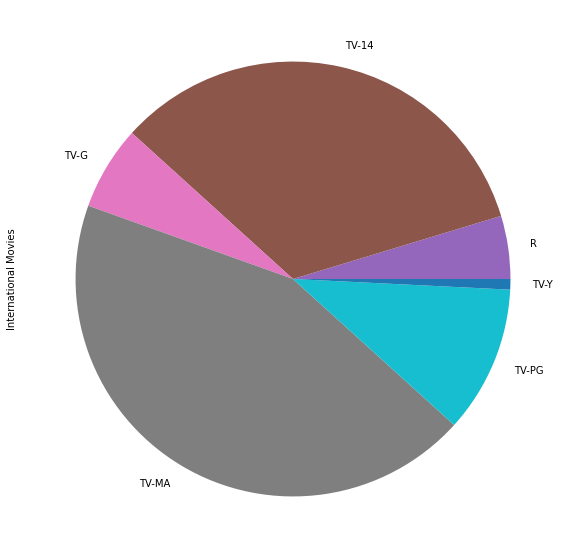

In [64]:
## International Movies - Rating Pie Chart

plt.figure(figsize=(15,10))
bycategory.unstack().T['International Movies'].plot(kind='pie')

<AxesSubplot:ylabel='Dramas'>

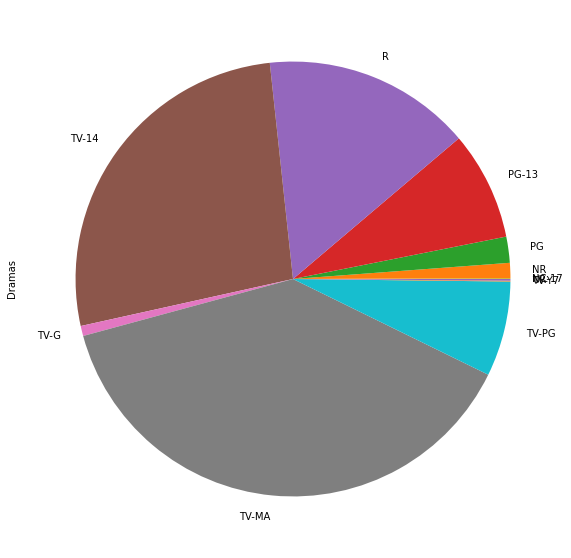

In [65]:
## Dramas - Rating Pie Chart

plt.figure(figsize=(15,10))
bycategory.unstack().T['Dramas'].plot(kind='pie')